In [1]:
import os, sys
# for accessing src, stan, etc.
sys.path.append(os.path.abspath(os.path.join("../..")))

import bayesflow as bf
import numpy as np
from matplotlib import pyplot as plt
from src.models.HmmEam import model, constrain_parameters, constrained_parameter_names, configurator

/Users/simonkucharsky/projects/bayesflow/amortized-mixture/.venv/lib/python3.11/site-packages/bayesflow/trainers.py:27: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
INFO:root:Performing 2 pilot runs with the anonymous model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 8)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 200, 3)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional simulation batchable context provided.


In [2]:
df = model(5000)

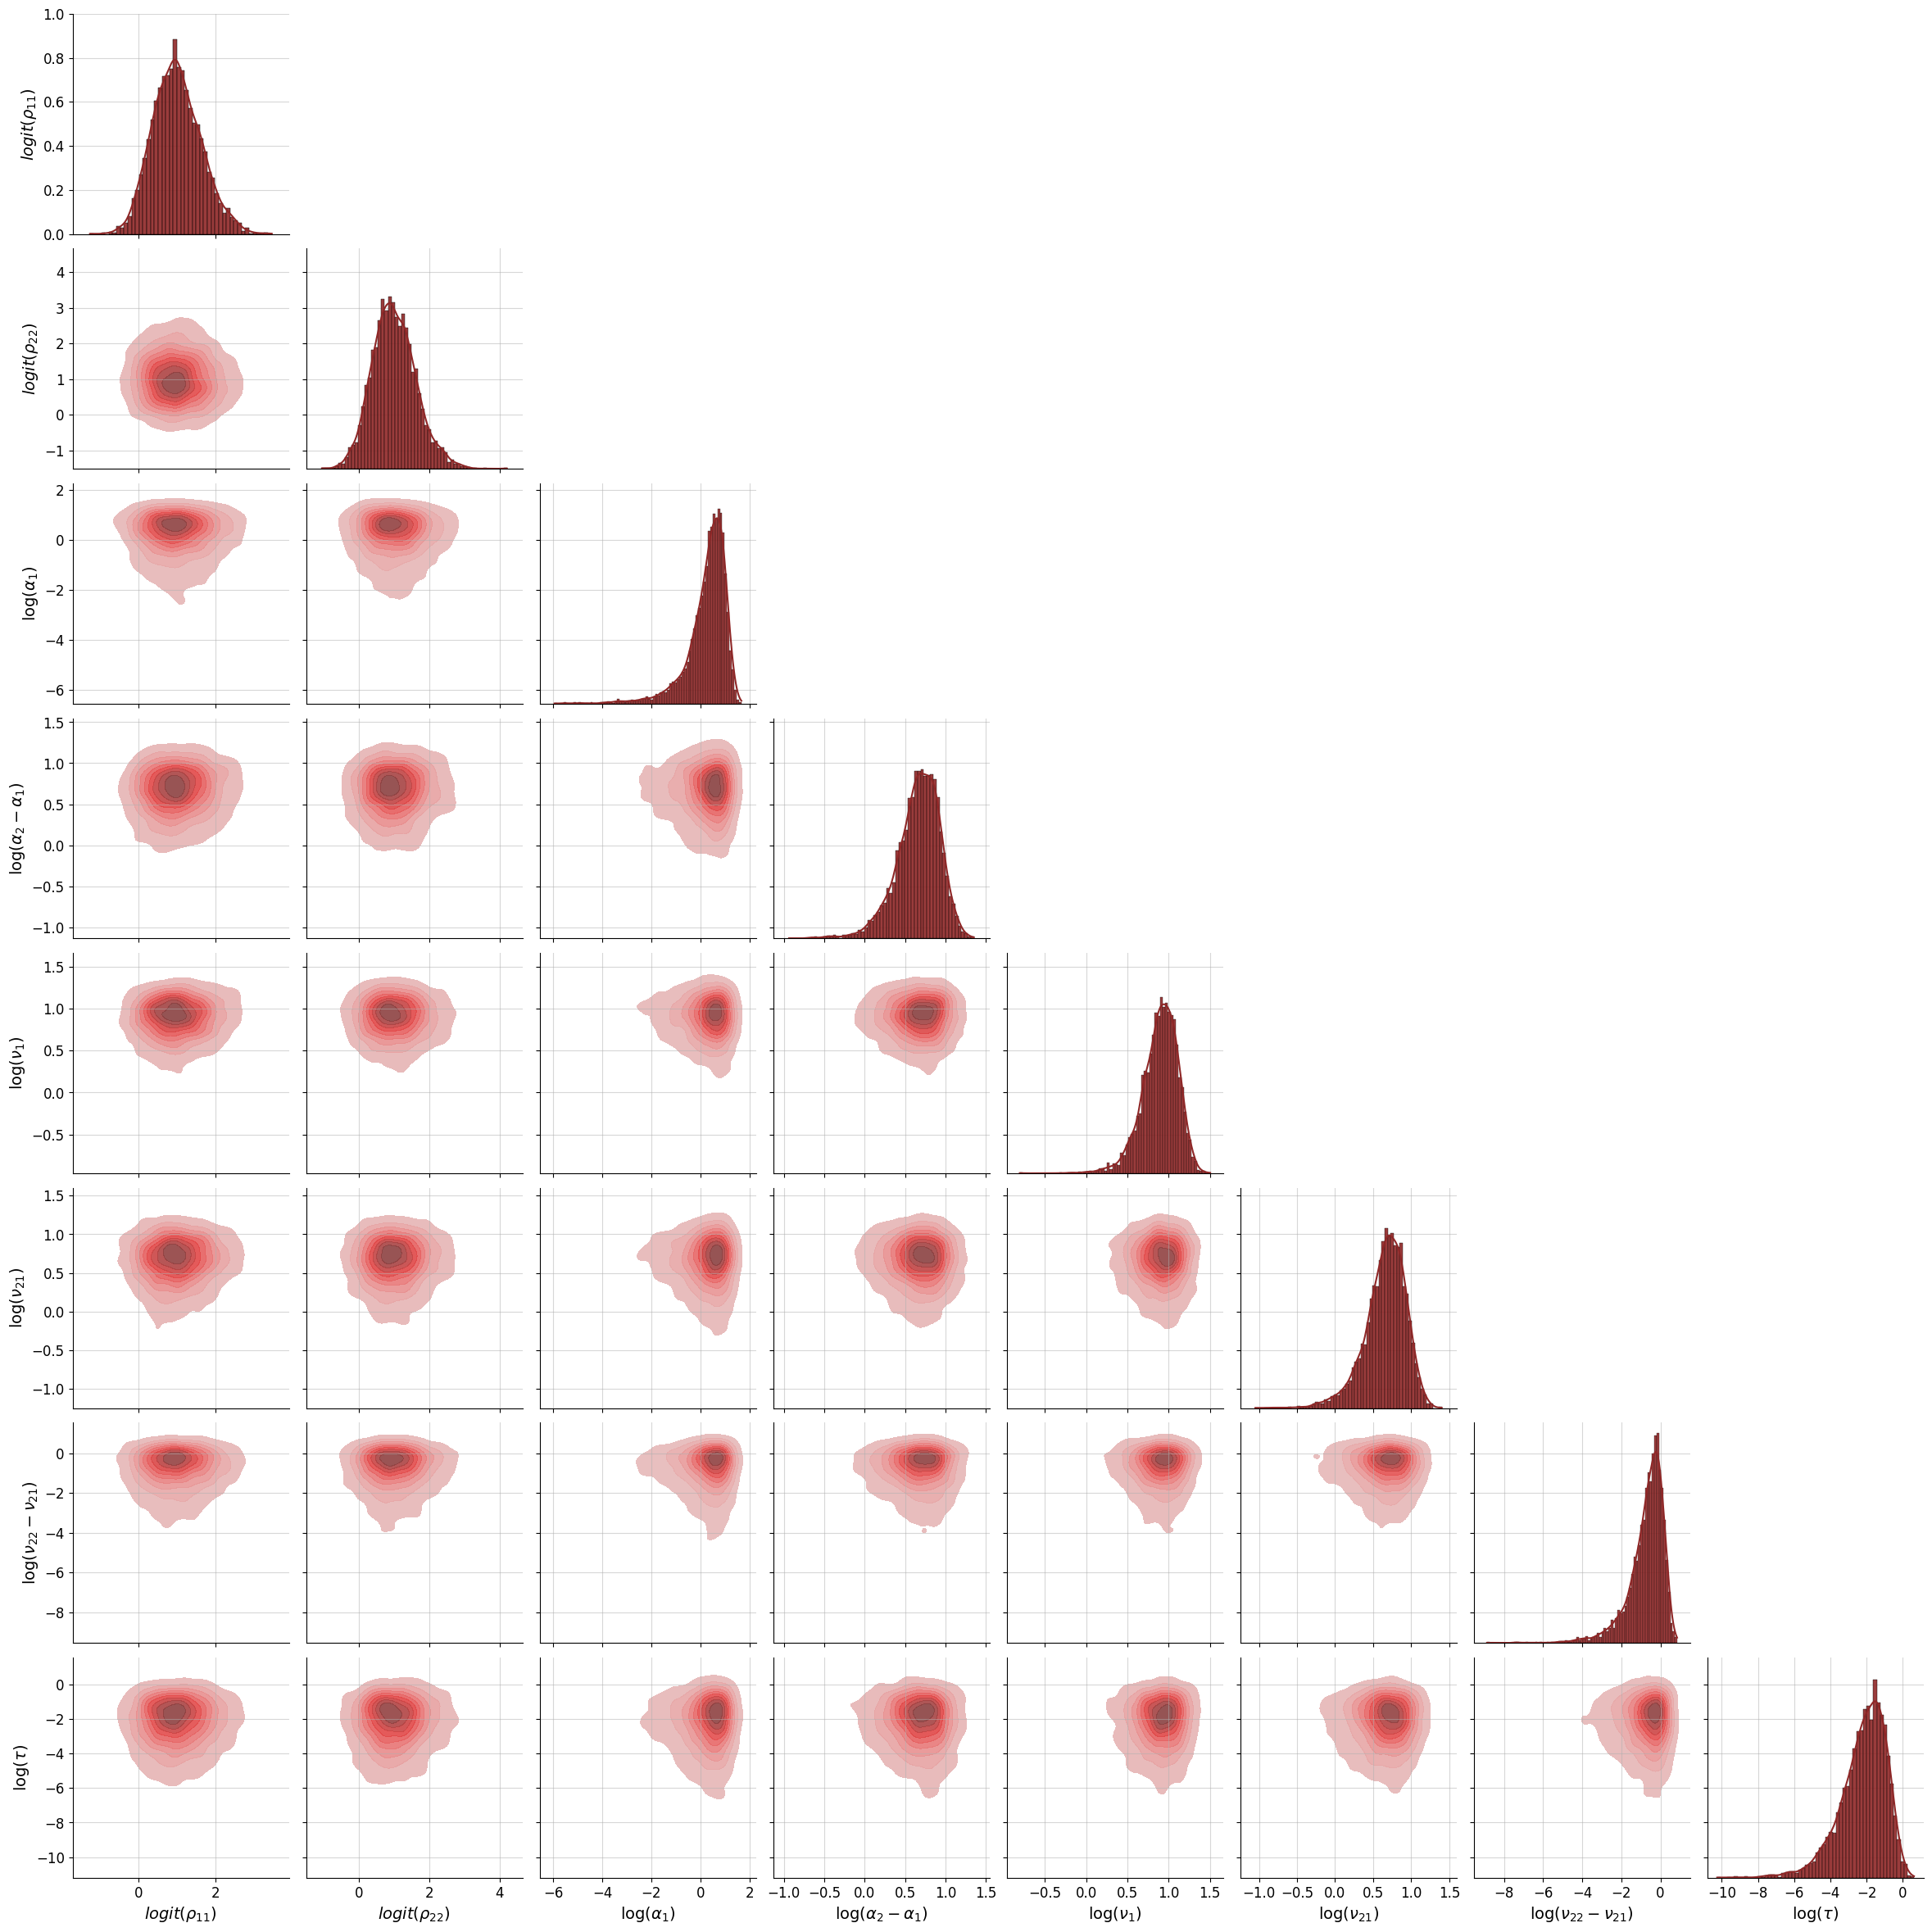

In [3]:
f=bf.diagnostics.plot_posterior_2d(df['prior_draws'], param_names=model.param_names)

In [4]:
np.mean(df['prior_draws'], axis=0)

array([ 0.99738638,  1.00063603,  0.25367366,  0.65703323,  0.89359924,
        0.65580575, -0.738101  , -2.19004806])

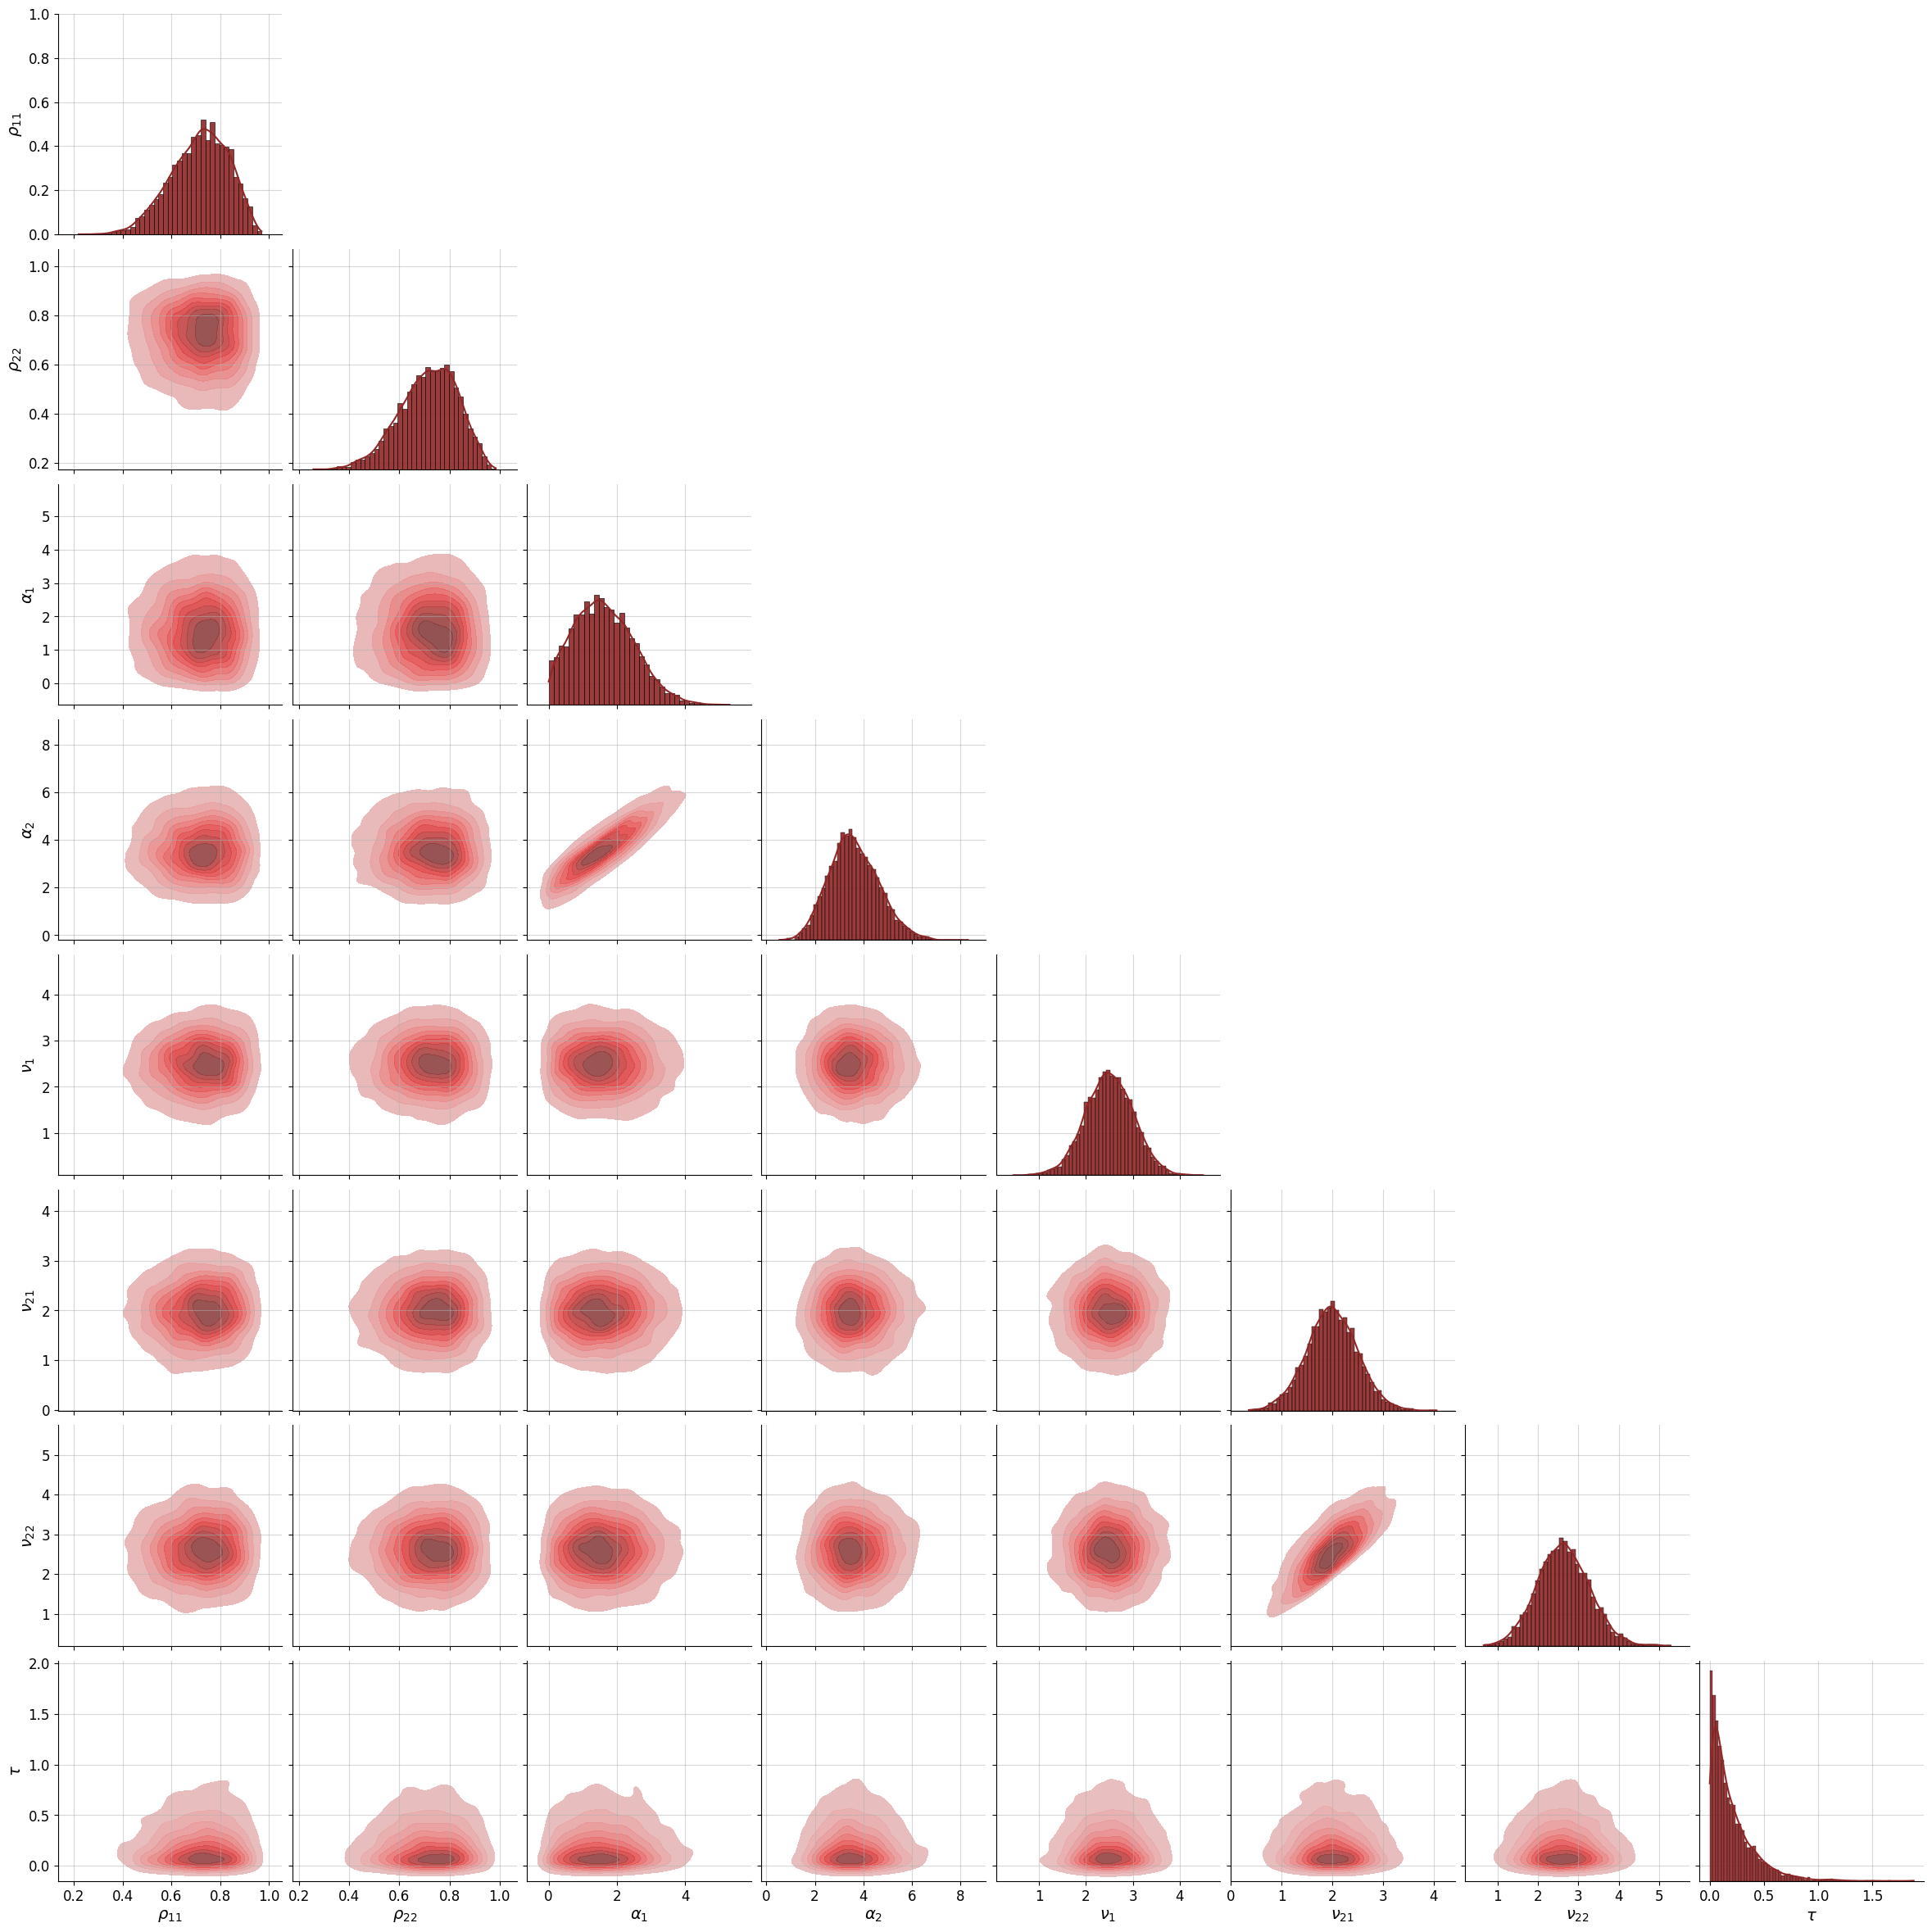

In [5]:
f=bf.diagnostics.plot_posterior_2d(constrain_parameters(df['prior_draws']), param_names=constrained_parameter_names)

In [6]:
rts = df['sim_data'][...,0]
rts

array([[0.12110442, 0.07592429, 0.54061797, ..., 0.81220089, 0.45657046,
        1.19121685],
       [1.3644187 , 0.59524916, 1.09033641, ..., 0.46088022, 0.64353976,
        1.4361725 ],
       [2.00605738, 1.49336005, 2.02101194, ..., 1.99184794, 1.88811107,
        1.42741792],
       ...,
       [1.86865162, 2.07064153, 2.58113557, ..., 1.15621405, 2.92644875,
        3.36582489],
       [2.70018592, 2.56464977, 2.81352851, ..., 1.36164439, 1.60131228,
        0.72065487],
       [1.06248707, 1.03414329, 1.0541213 , ..., 1.70196969, 1.2960006 ,
        1.38079493]])

In [7]:
responses = df['sim_data'][...,1]
responses

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 1.]])

In [8]:
states = df['sim_data'][...,2]
states

array([[0., 0., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 1.]])

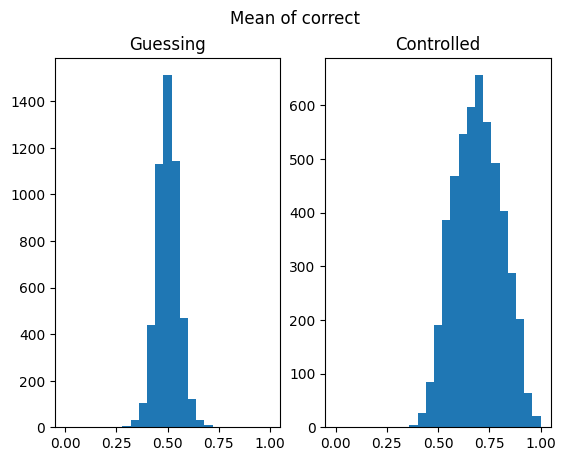

In [9]:
fig, axs = plt.subplots(ncols=2, nrows=1)

for i, state in enumerate(['Guessing', 'Controlled']):
    f=axs[i].hist(np.nanmean(np.where(states==i, responses, np.nan), axis=1), bins=np.linspace(0, 1, 26))
    f=axs[i].set_title(state)
f=fig.suptitle("Mean of correct")

/var/folders/vn/tvq3_rgx63795x08zmwtn_rr0000gn/T/ipykernel_2402/3337546835.py:8: RuntimeWarning: Mean of empty slice
  f=axs[i,j].hist(np.nanmean(np.where(np.all([states==i, responses==j], axis=0), rts, np.nan), axis=1), bins=bins)


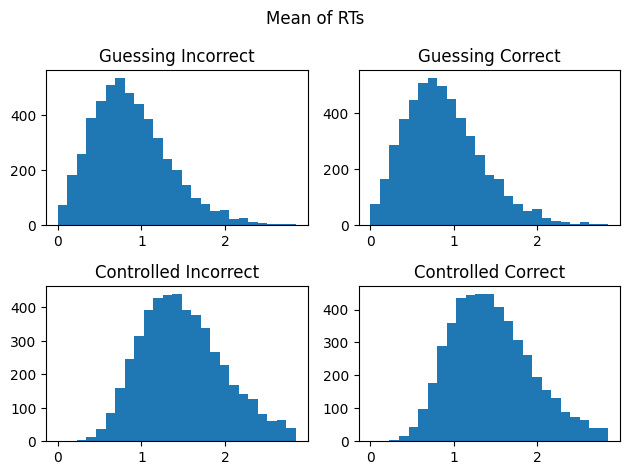

In [10]:
fig, axs = plt.subplots(ncols=2, nrows=2)

bins = np.linspace(0.0, np.quantile(np.mean(rts, axis=-1), q=0.995), 26)

for i, state in enumerate(['Guessing', 'Controlled']):
    for j, response in enumerate(['Incorrect', 'Correct']):
        f=axs[i,j].set_title("{} {}".format(state, response))
        f=axs[i,j].hist(np.nanmean(np.where(np.all([states==i, responses==j], axis=0), rts, np.nan), axis=1), bins=bins)
f=fig.suptitle("Mean of RTs")
f=fig.tight_layout()

/Users/simonkucharsky/projects/bayesflow/amortized-mixture/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


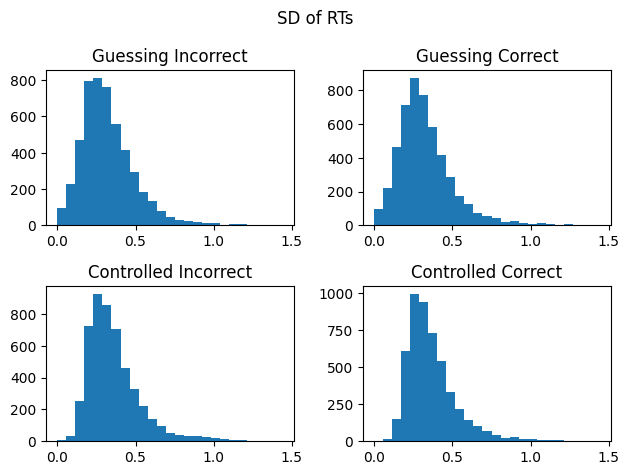

In [11]:
fig, axs = plt.subplots(ncols=2, nrows=2)

bins = np.linspace(0.0, np.quantile(np.std(rts, axis=-1), q=0.995), 26)

for i, state in enumerate(['Guessing', 'Controlled']):
    for j, response in enumerate(['Incorrect', 'Correct']):
        f=axs[i,j].set_title("{} {}".format(state, response))
        f=axs[i,j].hist(np.nanstd(np.where(np.all([states==i, responses==j], axis=0), rts, np.nan), axis=1), bins=bins)
f=fig.suptitle("SD of RTs")
f=fig.tight_layout()